In [1]:
#change style
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
%matplotlib inline




In [2]:
"""#I put all of this in data.py
from urllib.request import urlretrieve
import pandas as pd
import os

#If I want to just refer to it on my computer
my_file = "data.csv"
URL="https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_data(filename,url):
    if not os.path.exists(filename):
        print("downloading data")
        urlretrieve(url,filename)
    data=pd.read_csv(my_file, index_col="Date", parse_dates=True) #for time series, make sure that the index is properly set
    data.columns=["West","East"] # so as to shorten the legend
    data["Total"]=data["West"]+data["East"]
    return data

data=get_data(my_file,URL)
"""
from jupyterworkflow.data import get_data   #the python package you created

data=get_data()


we also refactored it for speed by replacing parse_dates.
because parse_dates reads the string and tries to infer the structure, it can take forever. 

However if I tell explicitely what the structure is, then it's much faster. Lookup "strftime" format

but basically in the package we changed it to 
data.index=pd.to_datetime(data.index,format="%m/%d/%Y %H:%M:%S %p")




In [3]:
data.head()

,West,East,Total
Date,,,
2012-10-03 12:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


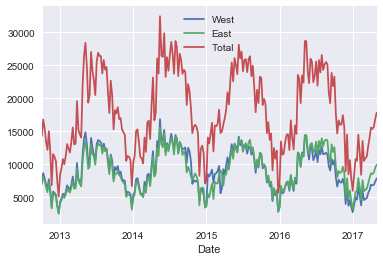

In [4]:

weekly_data=data.resample("W").sum()

weekly_data.plot()


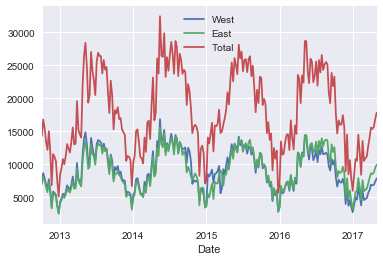

In [5]:

data.resample("W").sum().plot()


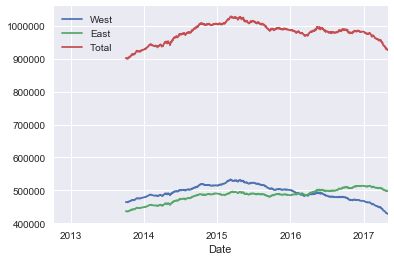

In [6]:
#you have data by the hour, so when you say you want it on a daily basis choose if you want a mean or a sum of what happens in a day.
daily_average=data.resample("D").mean() #.head()
daily_total=data.resample("D").sum() #.head()
daily_total_rolling_sum=data.resample("D").sum().rolling(365).sum() #take that daily total and establish a rolling sum 
daily_total_rolling_sum.plot()


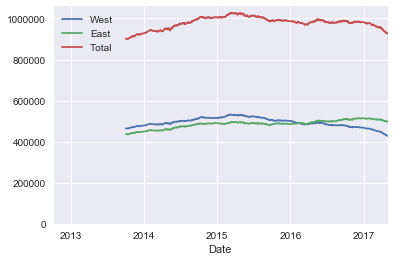

In [7]:
#setting the y axis

ax=data.resample("D").sum().rolling(365).sum().plot() #notice you are setting this plot as a variable ax
ax.set_ylim(0,None); #saying that y should start at 0



In [8]:
print(data.index) #this gives whatever you choose to be your index col
print(data.index.time) #turns that string of time into datetime for the TIME OF DAY ONLY

print(data.groupby(data.index.time).mean().head())

DatetimeIndex(['2012-10-03 12:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2017-04-30 02:00:00', '2017-04-30 03:00:00',
               '2017-04-30 04:00:00', '2017-04-30 05:00:00',
               '2017-04-30 06:00:00', '2017-04-30 07:00:00',
               '2017-04-30 08:00:00', '2017-04-30 09:00:00',
               '2017-04-30 10:00:00', '2017-04-30 11:00:00'],
              dtype='datetime64[ns]', name='Date', length=40104, freq=None)
[datetime.time(12, 0) datetime.time(1, 0) datetime.time(2, 0) ...,
 datetime.time(9, 0) datetime.time(10, 0) datetime.time(11, 0)]
               West        East       Total
01:00:00  26.286056   23.870437   50.156493
02:00:00  27.026355   26.193172   53.219527
03:00:00  31.135847   34.449731

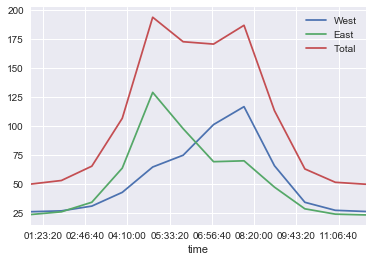

In [9]:
#looking at it intra day
#groupby simply orders them by similar groups. in this case they're grouped based on the time of day
#so data.index.time gets rid of the days part, just keeps time of day. And you group by all those who have the same time of day.
#print(data.groupby(data.index.time).mean().head()) 

data.groupby(data.index.time).mean().plot();

In [10]:
#for pivot tables, think of excel pivot tables where you can sort entire table based on column keys
#in pivot_table mode, your columns setting is no longer "extra data", it's just another way of segmenting
#the data you selected under "values"

pivoted=data.pivot_table(values=["Total"], index=data.index.time)
print(pivoted.iloc[:5])

#you can select your aggregation funciton. By default it's always the mean, but here you set it to sum
#basically you have the sum of all the bike rides by each our of everyday.
pivoted=data.pivot_table(values=["Total"], index=data.index.time,aggfunc=[np.sum])
print(pivoted.iloc[:5])

#the columns give you an extra way to segment your data

pivoted=data.pivot_table("Total", index=data.index.time, columns=data.index.date)
print(pivoted.iloc[:5,:5])

#when you plot it, you can think as your index as what's on your X

               Total
01:00:00   50.156493
02:00:00   53.219527
03:00:00   65.585577
04:00:00  106.893477
05:00:00  194.099042
               sum
             Total
01:00:00  167623.0
02:00:00  177700.0
03:00:00  219187.0
04:00:00  357238.0
05:00:00  648679.0
          2012-10-03  2012-10-04  2012-10-05  2012-10-06  2012-10-07
01:00:00        50.0        64.5        60.0        96.0       122.5
02:00:00        65.0        64.0        66.0       106.0       122.0
03:00:00        84.5        75.0        84.0       107.0       118.5
04:00:00       161.0       141.5       159.5        94.0       114.0
05:00:00       307.0       266.5       229.5        92.5       100.0


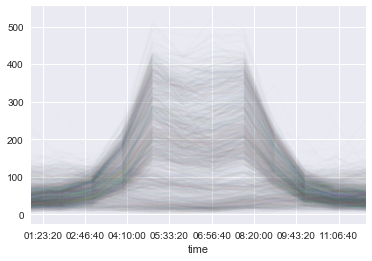

In [11]:
pivoted.plot(legend=False,alpha=0.01) #takes a while because you have a line for each day of the day

#so you can see how this would have been different from simply plotting the original data
#where each day is one after the other. here each day is it's own entire line
#plot() will plot each column, here the number of columns is the number of days


In [12]:
#you'll notice that most of there's some noise in middle, but most of the time
# the traffic happens during commute times


In [13]:
#the following will bring up the """ whatever is here""" that's inside the function 
#
get_data?